In [1]:
import pandas as pd

# Load the datasets
athlete_event_results = pd.read_csv('Olympic_Athlete_Event_Results.csv')
athlete_bio = pd.read_csv('Olympic_Athlete_Bio.csv')

# Display the first few rows of each dataset
athlete_event_results.head(1000)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False
...,...,...,...,...,...,...,...,...,...,...,...
995,1988 Summer Olympics,22,ANG,Judo,"Heavyweight, Men",16794,Helder de Carvalho,33640,=13,na,False
996,1988 Summer Olympics,22,ANG,Swimming,"50 metres Freestyle, Men",7257,Pedro Lima,44913,DQ,na,False
997,1988 Summer Olympics,22,ANG,Swimming,"100 metres Freestyle, Men",7270,Pedro Lima,44913,62,na,False
998,1988 Summer Olympics,22,ANG,Swimming,"100 metres Breaststroke, Men",7337,Gaspar Fragata,44910,59,na,False


In [2]:
athlete_bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,16809,Károly Teppert,Male,1891-07-20,na,na,Hungary,HUN,Károly Teppert started competing in cycling in...,na
1,43737,Andrzej Socharski,Male,1947-08-31,173.0,72,Poland,POL,na,Listed in Olympians Who Won a Medal at the Wor...
2,50147,Nathalie Wunderlich,Female,1971-06-03,170.0,50,Switzerland,SUI,na,na
3,5085,Miha Lokar,Male,1935-09-10,182.0,76,Yugoslavia,YUG,na,Listed in Olympians Who Won a Medal at the Eur...
4,136329,Austin Hack,Male,1992-05-17,203.0,100,United States,USA,na,na


In [24]:
# Join the two datasets on athlete_id
merged_data = pd.merge(athlete_event_results, athlete_bio, on='athlete_id', how='inner')

merged_data = merged_data[merged_data['edition'].str.contains(r'Summer Olympics$', regex = True)]

# Filter only rows where medals were awarded
medal_data = merged_data[merged_data['medal'].isin(['Gold', 'Silver', 'Bronze'])]
#Filter only summer olympic events

# Count the number of each type of medal for each athlete
medal_counts = medal_data.groupby(['name','sport','country', 'medal'])['result_id'].count().unstack().reset_index().fillna(0)

# Calculate total medals for each athlete
medal_counts['Total'] = medal_counts[['Gold', 'Silver', 'Bronze']].sum(axis=1)

# Identify top 25 athletes with most medals
top_25_athletes = medal_counts.nlargest(100, 'Total')

top_25_athletes.to_csv('top_100_athletes.csv')
top_25_athletes



medal,name,sport,country,Bronze,Gold,Silver,Total
17627,Michael Phelps,Swimming,United States,2.0,23.0,3.0,28.0
14881,Larisa Latynina,Artistic Gymnastics,Soviet Union,4.0,9.0,5.0,18.0
18831,Nikolay Andrianov,Artistic Gymnastics,Soviet Union,3.0,7.0,5.0,15.0
3552,Boris Shakhlin,Artistic Gymnastics,Soviet Union Ukraine,2.0,7.0,4.0,13.0
6409,Edoardo Mangiarotti,Fencing,Italy,2.0,6.0,5.0,13.0
...,...,...,...,...,...,...,...
9348,Gwen Torrence,Athletics,United States,1.0,4.0,2.0,7.0
9997,Heike Drechsler,Athletics,East Germany Germany,3.0,2.0,2.0,7.0
10598,Huang Xuechen,Artistic Swimming,People's Republic of China,2.0,0.0,5.0,7.0
10856,Ildikó Rejtő-Ujlaky-Sági,Fencing,Hungary,2.0,2.0,3.0,7.0


C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: Fu

C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: Fu

C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\johnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: Fu

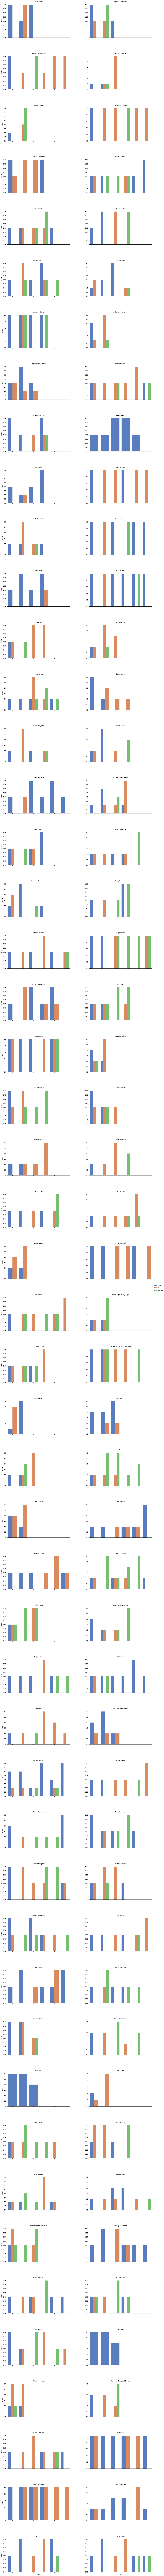

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the original merged data to include only the top 10 athletes
top_10_data = medal_data[medal_data['name'].isin(top_25_athletes['name'])]

# Create a grouped data for visualization
grouped_data = top_10_data.groupby(['name', 'event', 'medal']).size().reset_index(name='count')

# Create a grid of plots
g = sns.FacetGrid(grouped_data, col="name", col_wrap=2, height=5, aspect=1.5, sharey=False)
g.map_dataframe(sns.barplot, x="event", y="count", hue="medal", palette="muted", ci=None)
g.set_xticklabels(rotation=90)
g.set_titles("{col_name}")
g.add_legend()

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [5]:
top_countries = medal_data['country'].value_counts().head(10).index.tolist()

# Group the data by country, sport, and medal type to count medals
country_sport_medal_type = medal_data.groupby(['country', 'sport', 'medal']).size().reset_index(name='medal_type_count')

# Pivot the table to get medals count for each medal type
pivoted_data = country_sport_medal_type.pivot_table(index=['country', 'sport'], columns='medal', values='medal_type_count', fill_value=0).reset_index()

# Calculate the total medal count for each sport by country
pivoted_data['medal_count'] = pivoted_data[['Bronze', 'Silver', 'Gold']].sum(axis=1)

# For each country, identify the top sport with the most medals
top_sport_medal_count = pivoted_data.groupby('country').apply(lambda x: x.nlargest(1, 'medal_count')).reset_index(drop=True)

# Filter the data for the top 10 countries
top_countries_top_sport = top_sport_medal_count[top_sport_medal_count['country'].isin(top_countries)]

# Sort and rearrange columns as per the given format
top_countries_top_sport = top_countries_top_sport[['country', 'sport', 'Bronze', 'Silver', 'Gold', 'medal_count']]
top_countries_top_sport.columns = ['country', 'top_sport', 'bronze_medals', 'silver_medals', 'gold_medals', 'medal_count']
top_countries_top_sport.sort_values(by='medal_count', ascending=False)


,country,top_sport,bronze_medals,silver_medals,gold_medals,medal_count
347,United States,Athletics,237,349,639,1225
17,Australia,Swimming,147,163,140,450
158,Great Britain,Athletics,169,158,81,408
199,Italy,Fencing,81,147,153,381
129,France,Fencing,90,99,128,317
312,Soviet Union,Artistic Gymnastics,42,87,122,251
172,Hungary,Fencing,76,61,102,239
145,Germany,Rowing,55,69,105,229
323,Sweden,Shooting,39,53,32,124
262,People's Republic of China,Artistic Gymnastics,35,37,48,120


In [6]:
# Identify the top 200 countries with the most medals overall
top_10_countries_overall = medal_data['country'].value_counts().head(200).index.tolist()

# Filter the pivoted data for these top 10 countries
top_countries_sport_overall = pivoted_data[pivoted_data['country'].isin(top_10_countries_overall)]

# For each country, identify the top sport with the most medals
top_sport_per_top_country = top_countries_sport_overall.groupby('country').apply(lambda x: x.nlargest(1, 'medal_count')).reset_index(drop=True)

# Sort and rearrange columns as per the given format
top_sport_per_top_country = top_sport_per_top_country[['country', 'sport', 'Bronze', 'Silver', 'Gold', 'medal_count']]
top_sport_per_top_country.columns = ['country', 'top_sport', 'bronze_medals', 'silver_medals', 'gold_medals', 'medal_count']
top_sport_per_top_country.sort_values(by='medal_count', ascending=False)

,country,top_sport,bronze_medals,silver_medals,gold_medals,medal_count
191,United States,Athletics,237,349,639,1225
8,Australia,Swimming,147,163,140,450
75,Great Britain,Athletics,169,158,81,408
99,Italy,Fencing,81,147,153,381
63,France,Fencing,90,99,128,317
...,...,...,...,...,...,...
181,Tajikistan,Athletics,0,0,1,1
198,Zambia,Athletics,0,1,0,1
136,People's Republic of China United States,Athletics,0,0,1,1
180,Syrian Arab Republic,Athletics,0,0,1,1


In [7]:
merged_data['sport'].unique()

array(['Athletics', 'Boxing', 'Diving', 'Swimming', 'Rugby', 'Rowing',
       'Shooting', 'Tennis', 'Artistic Gymnastics', 'Cycling Track',
       'Wrestling', 'Fencing', 'Art Competitions', 'Cycling Road',
       'Artistic Swimming', 'Judo', 'Sailing', 'Weightlifting',
       'Taekwondo', 'Archery', 'Golf', 'Canoe Sprint',
       'Cycling Mountain Bike', 'Modern Pentathlon', 'Handball',
       'Basketball', 'Roller Hockey', 'Beach Volleyball', 'Triathlon',
       'Hockey', 'Football', 'Badminton', 'Wushu', 'Rhythmic Gymnastics',
       'Equestrian Jumping', 'Canoe Slalom', 'Karate', 'Table Tennis',
       'Volleyball', 'Trampolining', 'Marathon Swimming',
       'Equestrian Eventing', 'Equestrian Dressage',
       'Cycling BMX Freestyle', 'Surfing', 'Water Polo', 'Baseball',
       'Cycling BMX Racing', 'Waterskiing', 'Rugby Sevens',
       'Skateboarding', 'Bowling', 'Softball', 'Sport Climbing',
       'Basque pelota', 'Figure Skating', 'Polo', 'Gliding',
       'Automobile Racing',

In [8]:
import pandas as pd



# LEFT JOIN the two datasets on athlete_id
merged_data = pd.merge(athlete_event_results, athlete_bio, on='athlete_id', how='left')

# Filter the data for Summer Olympics and 100 metres events
filtered_data = merged_data[merged_data['edition'].str.contains('Summer Olympics') & 
                            merged_data['event'].isin(['100 metres, Men', '100 metres, Women']) & 
                            merged_data['medal'].isin(['Gold', 'Silver', 'Bronze'])]

# Group by country, event, and medal to count medals
grouped_medals = filtered_data.groupby(['country', 'event', 'medal']).size().reset_index(name='count')

# Pivot table to have medal types as columns
pivoted_medals = grouped_medals.pivot_table(index=['country', 'event'], columns='medal', values='count', fill_value=0).reset_index()

# Calculate total medal count for each event by country
pivoted_medals['total_medals'] = pivoted_medals[['Bronze', 'Silver', 'Gold']].sum(axis=1)

# Sort by total medals and select the top 15 countries for each event
top_15_100m_men = pivoted_medals[pivoted_medals['event'] == '100 metres, Men'].nlargest(15, 'total_medals')
top_15_100m_women = pivoted_medals[pivoted_medals['event'] == '100 metres, Women'].nlargest(15, 'total_medals')

# Concatenate the two dataframes to get the final result
final_top_15 = pd.concat([top_15_100m_men, top_15_100m_women])

final_top_15[['country', 'event', 'Bronze', 'Silver', 'Gold', 'total_medals']]


medal,country,event,Bronze,Silver,Gold,total_medals
36,United States,"100 metres, Men",9,15,16,40
14,Great Britain,"100 metres, Men",3,2,3,8
20,Jamaica,"100 metres, Men",1,4,3,8
6,Canada,"100 metres, Men",5,0,2,7
12,Germany,"100 metres, Men",2,1,1,4
35,Trinidad and Tobago,"100 metres, Men",1,2,1,4
8,Cuba,"100 metres, Men",0,2,0,2
23,Namibia,"100 metres, Men",0,2,0,2
34,Soviet Union Ukraine,"100 metres, Men",1,0,1,2
0,Australia,"100 metres, Men",1,0,0,1


In [9]:
# Filter the data for Marathons for Men and Marathons for Women events
marathon_data = merged_data[merged_data['event'].isin(['Marathon, Men', 'Marathon, Women']) & 
                            merged_data['medal'].isin(['Gold', 'Silver', 'Bronze'])]

# Group by country, event, and medal to count medals
grouped_marathon_medals = marathon_data.groupby(['country', 'event', 'medal']).size().reset_index(name='count')

# Pivot table to have medal types as columns
pivoted_marathon_medals = grouped_marathon_medals.pivot_table(index=['country', 'event'], columns='medal', values='count', fill_value=0).reset_index()

# Calculate total medal count for each marathon event by country
pivoted_marathon_medals['total_medals'] = pivoted_marathon_medals[['Bronze', 'Silver', 'Gold']].sum(axis=1)

# Sort by total medals and select the top 15 countries for each event
top_15_marathon_men = pivoted_marathon_medals[pivoted_marathon_medals['event'] == 'Marathon, Men'].nlargest(15, 'total_medals')
top_15_marathon_women = pivoted_marathon_medals[pivoted_marathon_medals['event'] == 'Marathon, Women'].nlargest(15, 'total_medals')

# Concatenate the two dataframes to get the final result
final_top_15_marathon = pd.concat([top_15_marathon_men, top_15_marathon_women])

final_top_15_marathon[['country', 'event', 'Bronze', 'Silver', 'Gold', 'total_medals']]


medal,country,event,Bronze,Silver,Gold,total_medals
42,United States,"Marathon, Men",5,3,3,11
11,Ethiopia,"Marathon, Men",3,1,4,8
24,Kenya,"Marathon, Men",2,3,3,8
13,Finland,"Marathon, Men",3,0,2,5
16,Great Britain,"Marathon, Men",1,4,0,5
3,Belgium,"Marathon, Men",3,1,0,4
14,France,"Marathon, Men",0,1,3,4
20,Italy,"Marathon, Men",1,1,2,4
21,Japan,"Marathon, Men",2,2,0,4
38,South Africa,"Marathon, Men",0,2,2,4


In [10]:
# Filter data for Summer Olympics and Basketball
basketball_data = merged_data[(merged_data['edition'].str.contains('Summer Olympics')) & 
                              (merged_data['sport'] == 'Basketball') & (merged_data['event'] == 'Basketball, Men') &
                              merged_data['medal'].isin(['Gold', 'Silver', 'Bronze'])]

# Pivot the table to have medal types as columns with countries as values
basketball_medals_pivot = basketball_data.pivot_table(index=['edition', 'event'], columns='medal', values='country', aggfunc='first').reset_index()

basketball_medals_pivot[['edition', 'event', 'Gold', 'Silver', 'Bronze']]

medal,edition,event,Gold,Silver,Bronze
0,1936 Summer Olympics,"Basketball, Men",United States,Canada,Mexico
1,1948 Summer Olympics,"Basketball, Men",United States,France,Brazil
2,1952 Summer Olympics,"Basketball, Men",United States,Soviet Union,Uruguay
3,1956 Summer Olympics,"Basketball, Men",United States,Soviet Union,Uruguay
4,1960 Summer Olympics,"Basketball, Men",United States,Soviet Union,Brazil
5,1964 Summer Olympics,"Basketball, Men",United States,Soviet Union,Brazil
6,1968 Summer Olympics,"Basketball, Men",United States,Yugoslavia,Soviet Union
7,1972 Summer Olympics,"Basketball, Men",Soviet Union,United States,Cuba
8,1976 Summer Olympics,"Basketball, Men",United States,Yugoslavia,Soviet Union
9,1980 Summer Olympics,"Basketball, Men",Yugoslavia,Italy,Russian Federation Soviet Union


In [11]:
basketball_women_data = merged_data[(merged_data['edition'].str.contains('Summer Olympics')) & 
                              (merged_data['sport'] == 'Basketball') & (merged_data['event'] == 'Basketball, Women') &
                              merged_data['medal'].isin(['Gold', 'Silver', 'Bronze'])]

# Pivot the table to have medal types as columns with countries as values
basketball_women_medals_pivot = basketball_women_data.pivot_table(index=['edition', 'event'], columns='medal', values='country', aggfunc='first').reset_index()

basketball_women_medals_pivot[['edition', 'event', 'Gold', 'Silver', 'Bronze']]

medal,edition,event,Gold,Silver,Bronze
0,1976 Summer Olympics,"Basketball, Women",Soviet Union,United States,Bulgaria
1,1980 Summer Olympics,"Basketball, Women",Soviet Union,Bulgaria,Yugoslavia
2,1984 Summer Olympics,"Basketball, Women",United States,Republic of Korea,People's Republic of China
3,1988 Summer Olympics,"Basketball, Women",United States,Yugoslavia,Soviet Union
4,1992 Summer Olympics,"Basketball, Women",Russian Federation Unified Team,People's Republic of China,United States
5,1996 Summer Olympics,"Basketball, Women",United States,Brazil,Australia
6,2000 Summer Olympics,"Basketball, Women",United States,Australia,Brazil
7,2004 Summer Olympics,"Basketball, Women",United States,Australia,Russian Federation
8,2008 Summer Olympics,"Basketball, Women",United States,Australia,Russian Federation
9,2012 Summer Olympics,"Basketball, Women",United States,France,Australia


In [12]:
# Redefine the chosen_sports list
chosen_sports = ['Athletics', 'Gymnastics', 'Fencing', 'Boxing', 'Weightlifting', 'Table Tennis', 'Wrestling', 'Archery', 'Shooting']

# Filter the dataset for the chosen sports disciplines and medal winners
sports_data = merged_data[(merged_data['sport'].isin(chosen_sports)) & merged_data['medal'].isin(['Bronze', 'Silver', 'Gold'])]

# Group by country, sport, and medal to count medals
grouped_medals = sports_data.groupby(['country', 'sport', 'medal']).size().reset_index(name='count')

# Pivot the table to get medal counts for each medal type by country and sport
medal_pivot = grouped_medals.pivot_table(index=['country', 'sport'], columns='medal', values='count', fill_value=0).reset_index()

# Sort the data for better visualization
sorted_medal_data = medal_pivot.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)

sorted_medal_data


medal,country,sport,Bronze,Gold,Silver
579,United States,Athletics,237,639,349
290,Italy,Fencing,81,153,147
195,France,Fencing,90,128,99
582,United States,Shooting,42,120,39
257,Hungary,Fencing,76,102,61
...,...,...,...,...,...
575,United Arab Republic,Boxing,1,0,0
585,Uruguay,Boxing,1,0,0
592,Venezuela,Shooting,1,0,0
602,West Indies Federation,Athletics,1,0,0


In [13]:
# Group by edition and country, and count the number of each type of medal
medal_counts = merged_data.groupby(['edition', 'country_noc_x', 'country']).medal.value_counts().unstack().reset_index()
medal_counts.fillna(0, inplace=True)

# Rename columns for clarity
medal_counts.rename(columns={'Gold': 'Gold Count', 'Silver': 'Silver Count', 'Bronze': 'Bronze Count', 'na': 'No Medal'}, inplace=True)

# Calculate total medals
medal_counts['Total Medals'] = medal_counts['Gold Count'] + medal_counts['Silver Count'] + medal_counts['Bronze Count']

medal_counts.head()

medal,edition,country_noc_x,country,Bronze Count,Gold Count,Silver Count,No Medal,Total Medals
0,1896 Summer Olympics,AUS,Australia,1.0,2.0,0.0,3.0,3.0
1,1896 Summer Olympics,AUS,Great Britain,1.0,0.0,0.0,0.0,1.0
2,1896 Summer Olympics,AUT,Austria,2.0,2.0,1.0,5.0,5.0
3,1896 Summer Olympics,BUL,Bulgaria,0.0,0.0,0.0,4.0,0.0
4,1896 Summer Olympics,DEN,Denmark,3.0,1.0,2.0,19.0,6.0


In [14]:
# Calculate the cumulative total medals for each country across all editions
top_countries = medal_counts.groupby('country').agg({'Total Medals': 'sum'}).sort_values(by='Total Medals', ascending=False)

# Get the top 10 countries based on cumulative total medal counts
top_10_countries = top_countries.head(10).index.tolist()

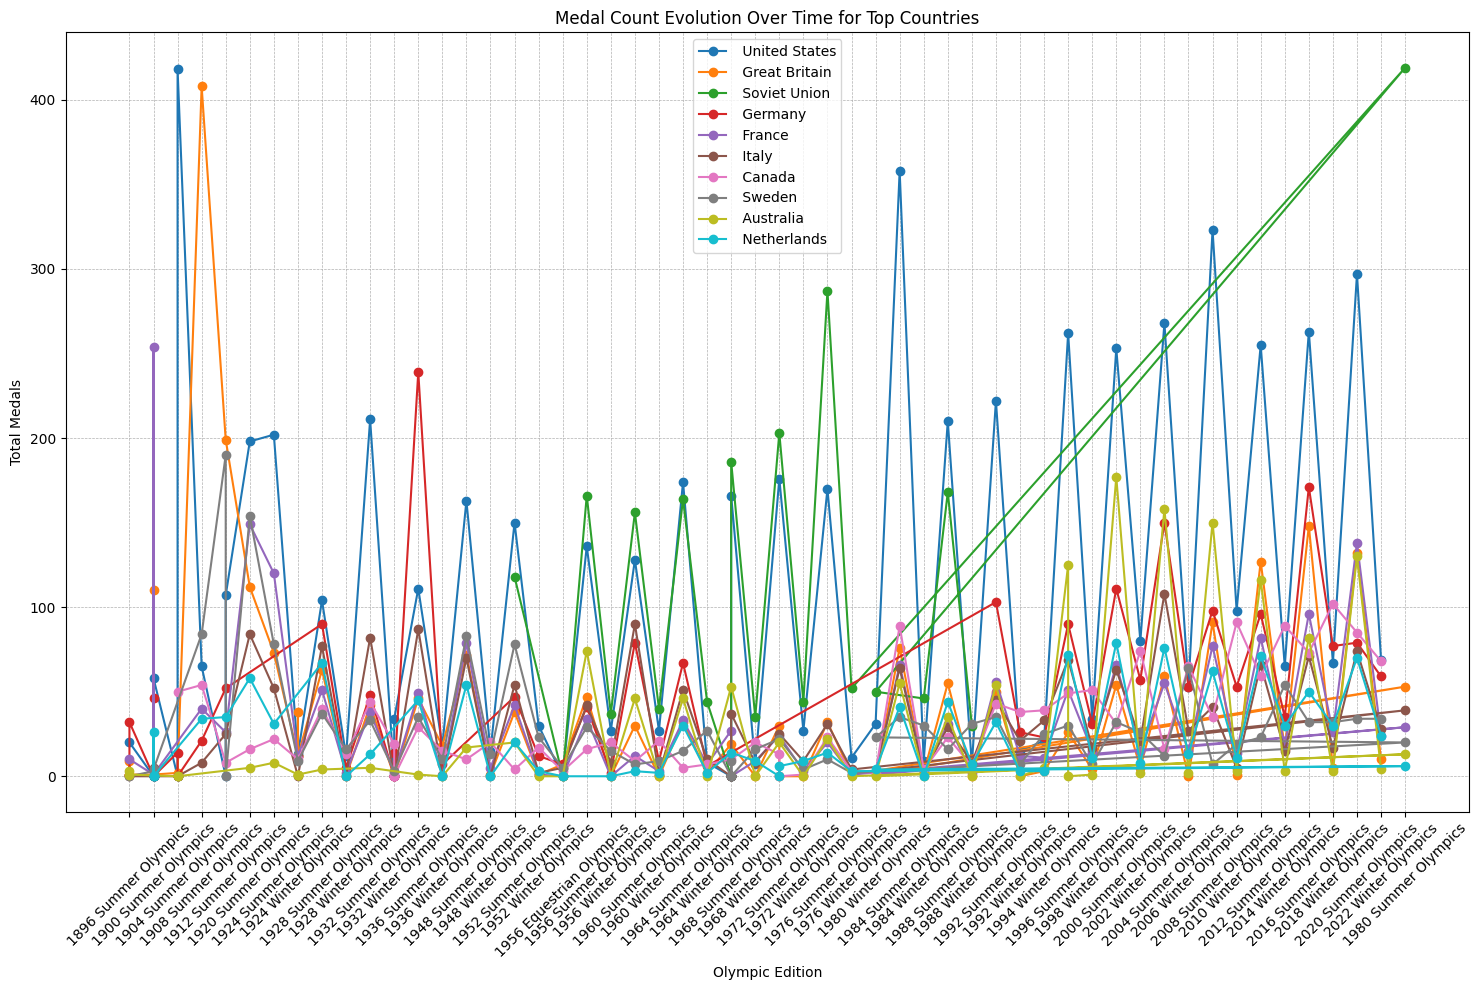

In [15]:
import matplotlib.pyplot as plt

# Filter the medal_counts dataframe to include only the top 10 countries
top_countries_df = medal_counts[medal_counts['country'].isin(top_10_countries)]

# Plotting
plt.figure(figsize=(15, 10))
for country in top_10_countries:
    country_df = top_countries_df[top_countries_df['country'] == country]
    plt.plot(country_df['edition'], country_df['Total Medals'], label=country, marker='o')

plt.title('Medal Count Evolution Over Time for Top Countries')
plt.xlabel('Olympic Edition')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


C:\Users\johnl\AppData\Local\Temp\ipykernel_27372\3106037327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_df['year'] = top_countries_df['edition'].str.extract('(\d+)').astype(int)


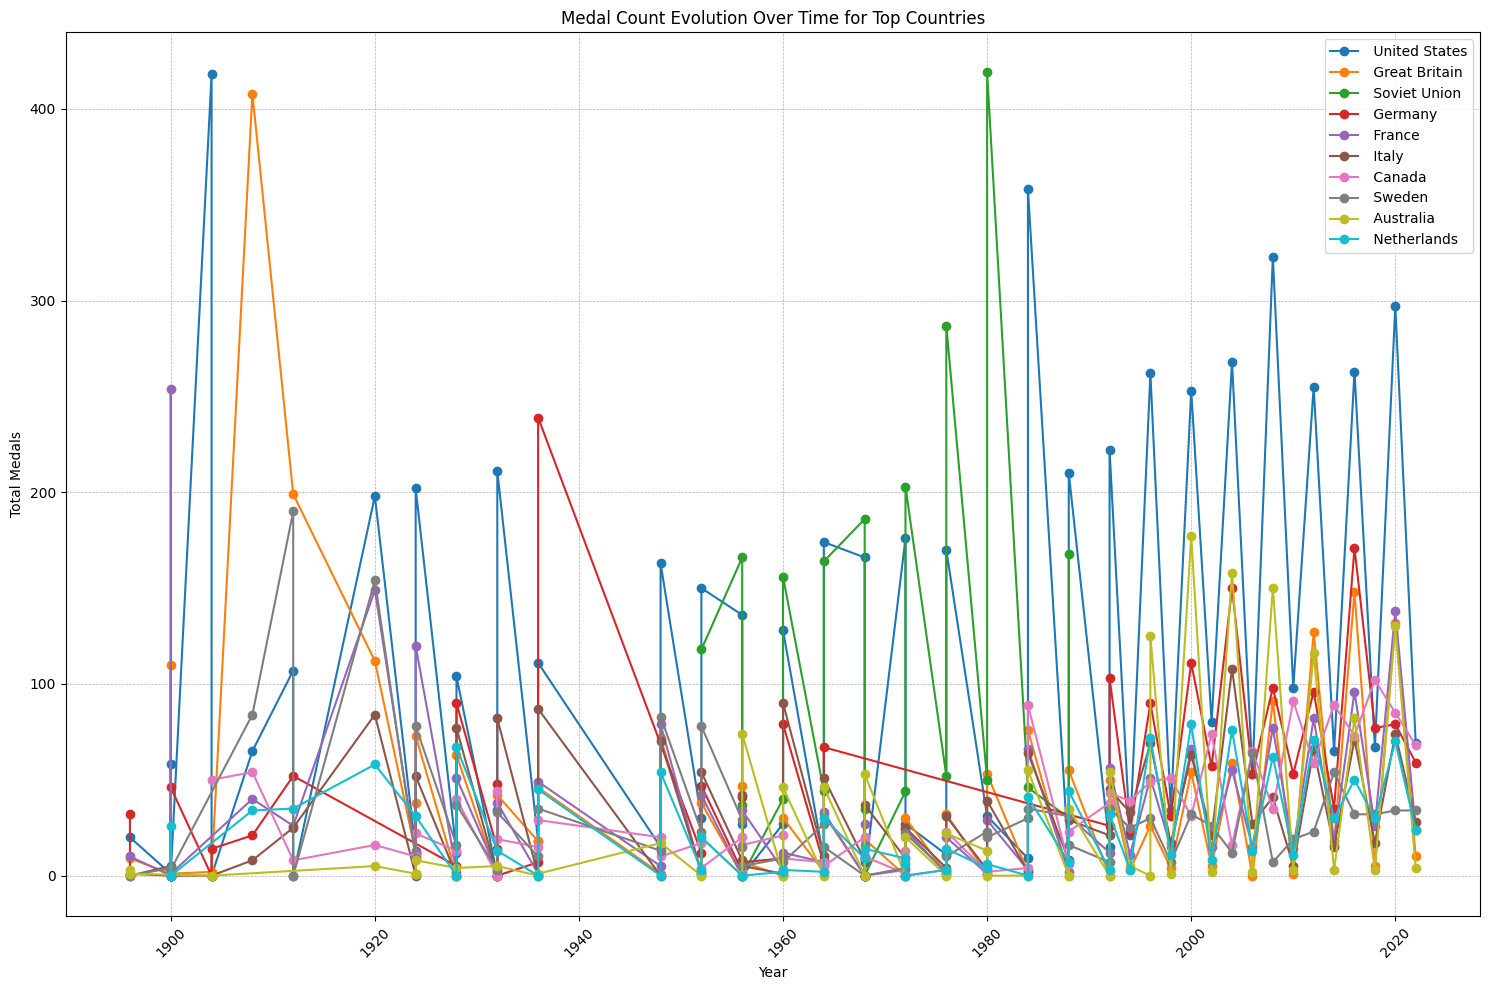

In [16]:
#MEDAL COUNT FOR EACH COUNTRY EVERY SUMMER OLYMPICS
# Extract year from the edition column for x-axis labeling
top_countries_df['year'] = top_countries_df['edition'].str.extract('(\d+)').astype(int)

# Sorting the dataframe by year in ascending order
top_countries_df = top_countries_df.sort_values(by='year')

# Plotting with updated x-axis labels
plt.figure(figsize=(15, 10))
for country in top_10_countries:
    country_df = top_countries_df[top_countries_df['country'] == country]
    plt.plot(country_df['year'], country_df['Total Medals'], label=country, marker='o')

plt.title('Medal Count Evolution Over Time for Top Countries')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


In [17]:
# Identify the top 25 countries based on cumulative total medal counts
top_25_countries = top_countries.head(25).index.tolist()

# Filter the dataframe to include only the top 25 countries
top_25_countries_df = merged_data[merged_data['country'].isin(top_25_countries)]

top_25_countries_df.head()

,edition,edition_id,country_noc_x,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country,country_noc_y,description,special_notes
142,1900 Summer Olympics,2,BOH,Cycling Track,"Tandem Sprint, Professionals, Men",925212,Karl Käser,890906,2 h8 r1/3,na,True,Karl Käser,Male,1874-03-22,na,na,Germany,GER,Karl Käser was a German professional cyclist w...,Listed in Olympians Who Died in Competition or...
148,1900 Summer Olympics,2,BOH,Tennis,"Doubles, Mixed",44067,Archibald Warden,119,=3,Bronze,True,Archibald Warden,Male,1869-05-11,na,na,France,FRA,Archibald Warden was a distinguished doctor wh...,na
10655,1968 Summer Olympics,17,ECU,Tennis,"Doubles, Men",900273,Teimuraz K'ak'ulia,902233,=3,na,True,Teimuraz K'ak'ulia,Male,1947-04-26,na,na,Soviet Union,URS,na,Listed in Olympians Who Won a Medal at the Sum...
10661,1968 Summer Olympics,17,ECU,Tennis,"Doubles, Women",900297,Suzana Petersen,901072,3,na,True,Suzana Petersen,Female,1947-10-14,na,na,Brazil,BRA,na,na
17719,1968 Summer Olympics,17,GDR,Artistic Gymnastics,"Individual All-Around, Men",70295,Matthias Brehme,30206,12,na,False,Matthias Brehme,Male,1943-02-07,169.0,63,East Germany,GDR,Matthias Brehme was a member of East Germany’s...,na


In [18]:
# Aggregate the number of male vs. female participants for each country over time
participants_by_gender = top_25_countries_df.groupby(['edition', 'country', 'sex']).athlete.nunique().unstack().reset_index()

# Aggregate the number of medals won by each gender (excluding 'na' as a medal type) for each country over time
medals_by_gender = top_25_countries_df[top_25_countries_df['medal'] != 'na'].groupby(['edition', 'country', 'sex']).medal.count().unstack().reset_index()

# Merge the two dataframes on edition and country
gender_stats = participants_by_gender.merge(medals_by_gender, on=['edition', 'country'], suffixes=('_participants', '_medals'))

gender_stats.head()

sex,edition,country,Female_participants,Male_participants,Female_medals,Male_medals
0,1896 Summer Olympics,Australia,NaN,1.0,NaN,4.0
1,1896 Summer Olympics,Denmark,NaN,4.0,NaN,6.0
2,1896 Summer Olympics,France,NaN,17.0,NaN,10.0
3,1896 Summer Olympics,Germany,NaN,19.0,NaN,33.0
4,1896 Summer Olympics,Great Britain,NaN,13.0,NaN,11.0


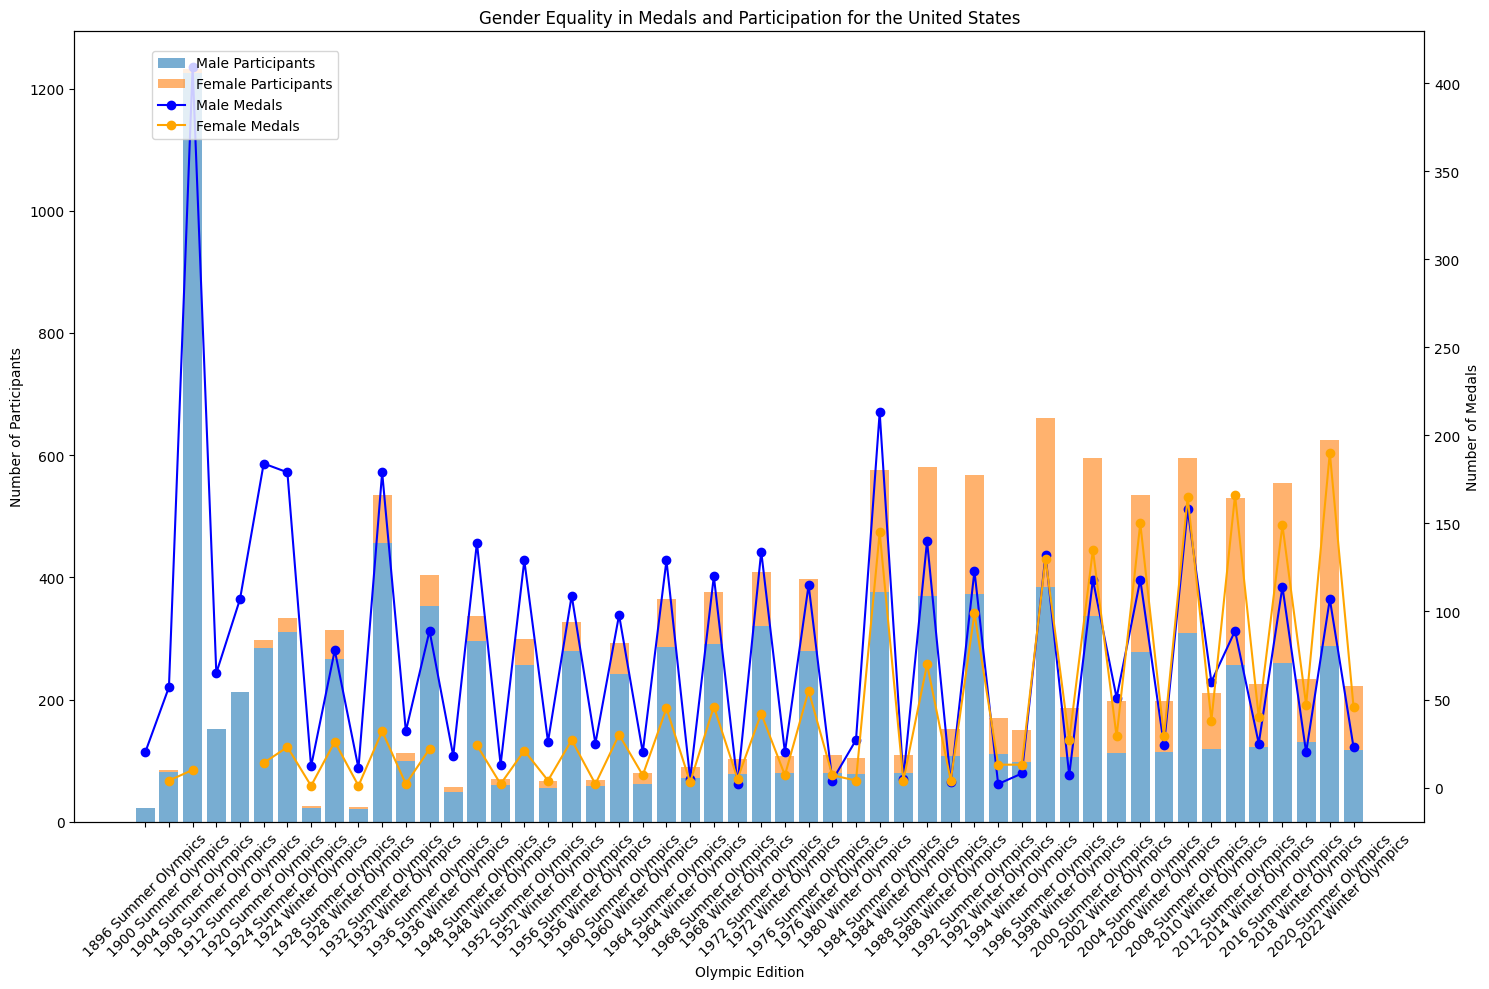

In [19]:
# Filter the data for the United States
us_gender_stats = gender_stats[gender_stats['country'] == ' United States']

# Create the dual-axis bar chart
fig, ax1 = plt.subplots(figsize=(15, 10))

# Bar chart for number of participants by gender
ax1.bar(us_gender_stats['edition'], us_gender_stats['Male_participants'], label='Male Participants', alpha=0.6)
ax1.bar(us_gender_stats['edition'], us_gender_stats['Female_participants'], label='Female Participants', alpha=0.6, bottom=us_gender_stats['Male_participants'])

# Set labels and title
ax1.set_xlabel('Olympic Edition')
ax1.set_ylabel('Number of Participants')
ax1.set_title('Gender Equality in Medals and Participation for the United States')
plt.xticks(rotation=45)

# Create the second axis for number of medals by gender
ax2 = ax1.twinx()
ax2.plot(us_gender_stats['edition'], us_gender_stats['Male_medals'], color='blue', marker='o', label='Male Medals')
ax2.plot(us_gender_stats['edition'], us_gender_stats['Female_medals'], color='orange', marker='o', label='Female Medals')
ax2.set_ylabel('Number of Medals')

# Display the legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))
plt.show()

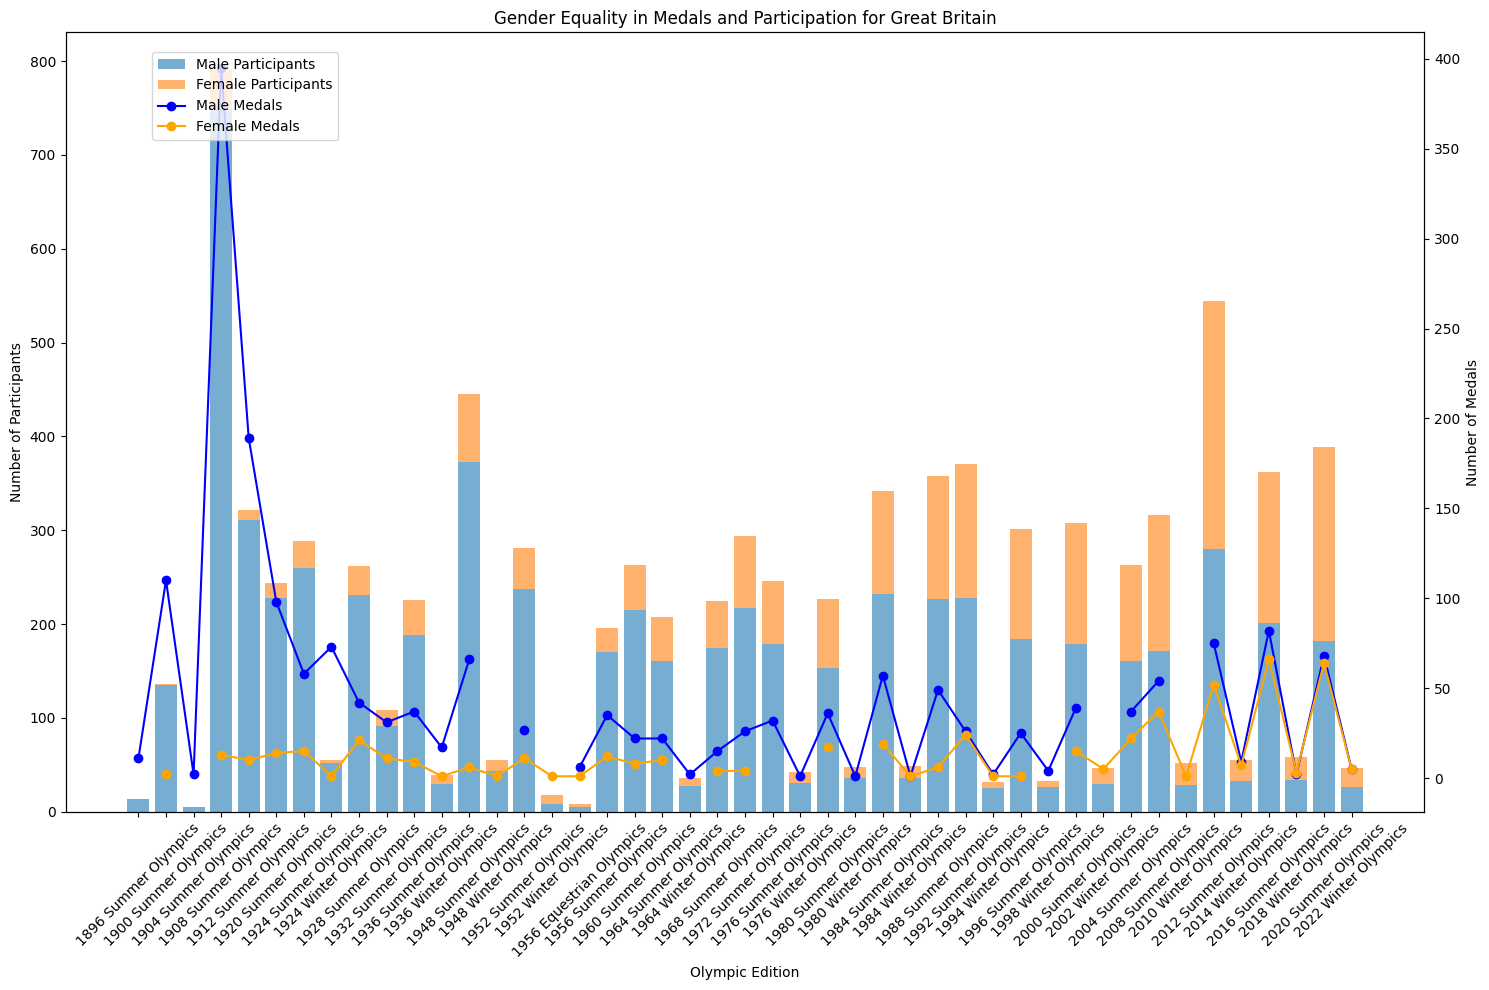

In [20]:
# Filter the data for Great Britain
gb_gender_stats = gender_stats[gender_stats['country'] == ' Great Britain']

# Create the dual-axis bar chart for Great Britain
fig, ax1 = plt.subplots(figsize=(15, 10))

# Bar chart for number of participants by gender
ax1.bar(gb_gender_stats['edition'], gb_gender_stats['Male_participants'], label='Male Participants', alpha=0.6)
ax1.bar(gb_gender_stats['edition'], gb_gender_stats['Female_participants'], label='Female Participants', alpha=0.6, bottom=gb_gender_stats['Male_participants'])

# Set labels and title
ax1.set_xlabel('Olympic Edition')
ax1.set_ylabel('Number of Participants')
ax1.set_title('Gender Equality in Medals and Participation for Great Britain')
plt.xticks(rotation=45)

# Create the second axis for number of medals by gender
ax2 = ax1.twinx()
ax2.plot(gb_gender_stats['edition'], gb_gender_stats['Male_medals'], color='blue', marker='o', label='Male Medals')
ax2.plot(gb_gender_stats['edition'], gb_gender_stats['Female_medals'], color='orange', marker='o', label='Female Medals')
ax2.set_ylabel('Number of Medals')

# Display the legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))
plt.show()

In [21]:
# Preparing data for Participants by Gender
participants_long = top_25_countries_df.groupby(['edition', 'country', 'sex']).athlete.nunique().reset_index()
participants_long.rename(columns={'athlete': 'Participants', 'sex': 'Gender'}, inplace=True)

# Preparing data for Medals by Gender
medals_long = top_25_countries_df[top_25_countries_df['medal'] != 'na'].groupby(['edition', 'country', 'sex']).medal.count().reset_index()
medals_long.rename(columns={'medal': 'Medals', 'sex': 'Gender'}, inplace=True)

# Merging the two dataframes on edition, country, and gender
tableau_df = participants_long.merge(medals_long, on=['edition', 'country', 'Gender'])

tableau_df.head()

,edition,country,Gender,Participants,Medals
0,1896 Summer Olympics,Australia,Male,1,4
1,1896 Summer Olympics,Denmark,Male,4,6
2,1896 Summer Olympics,France,Male,17,10
3,1896 Summer Olympics,Germany,Male,19,33
4,1896 Summer Olympics,Great Britain,Male,13,11


In [22]:
pd.to_csv('')

AttributeError: module 'pandas' has no attribute 'to_csv'

In [ ]:
# Filter the medal_counts dataframe for the top 25 countries
top_25_medal_counts = medal_counts[medal_counts['country'].isin(top_25_countries)]

# Select relevant columns and structure the dataframe for Tableau
tableau_medal_df = top_25_medal_counts[['edition', 'country', 'Gold Count', 'Silver Count', 'Bronze Count', 'Total Medals']]
tableau_medal_df.rename(columns={'Gold Count': 'Gold', 'Silver Count': 'Silver', 'Bronze Count': 'Bronze'}, inplace=True)
tableau_medal_df['country'].loc[tableau_medal_df['country'] == 'East Germany'] = 'Germany'
tableau_medal_df['country'].loc[tableau_medal_df['country'] == 'Soviet Union'] = 'Russian Federation'
tableau_medal_df['year'] = tableau_medal_df['edition'].str.extract('(\d+)').astype(int)

tableau_medal_df.head(25)


In [ ]:
tableau_medal_df.to_csv('Top_Country_Of_Every_Year.csv')

In [ ]:
United_states = tableau_medal_df[tableau_medal_df['edition'] == '1980 Summer Olympics']
United_states

In [ ]:
merged_data = merged_data[merged_data['country'] == 'United States']
merged_data = merged_data[merged_data['edition'] == '1980 Summer Olympics']
merged_data

In [ ]:
# Load the datasets
athlete_bio = pd.read_csv('Olympic_Athlete_Bio.csv')
athlete_event_results = pd.read_csv('Olympic_Athlete_Event_Results.csv')

# LEFT JOIN on athlete_id
merged_data = pd.merge(athlete_event_results, athlete_bio, on="athlete_id", how="left")

# Filter for summer Olympic events only
summer_events = merged_data[merged_data['edition'].str.contains('Summer')]

summer_events.head()

In [ ]:
# Re-load the two datasets
athlete_event_results = pd.read_csv("Olympic_Athlete_Event_Results.csv")
athlete_bio = pd.read_csv("Olympic_Athlete_Bio.csv")

# LEFT JOIN the two datasets on athlete_id
merged_df = pd.merge(athlete_event_results, athlete_bio, on="athlete_id", how="left")

# Filter the dataframe for Summer Olympics only
summer_df = merged_df[merged_df['edition'].str.contains("Summer")]

# Replace country values as instructed
summer_df['country'] = summer_df['country'].replace({'Soviet Union': 'Russian Federation', 
                              'East Germany': 'Germany', 
                              'West Germany': 'Germany'}, inplace=True)

# Display the first few rows of the filtered dataframe
summer_df.head()


In [ ]:
# Create columns for Gold, Silver, and Bronze with values of 1 or 0
summer_df['Gold'] = (summer_df['medal'] == 'Gold').astype(int)
summer_df['Silver'] = (summer_df['medal'] == 'Silver').astype(int)
summer_df['Bronze'] = (summer_df['medal'] == 'Bronze').astype(int)

# Extract the year from the edition column
summer_df['Year'] = summer_df['edition'].str.extract('(\d+)').astype(int)

# Group by country and year, then aggregate medal counts
grouped_df = summer_df.groupby(['country', 'Year']).agg({'Gold': 'sum', 'Silver': 'sum', 'Bronze': 'sum'}).reset_index()

# Calculate total medals
grouped_df['Total'] = grouped_df['Gold'] + grouped_df['Silver'] + grouped_df['Bronze']

# Display the aggregated data
grouped_df.head()
